In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

hms_harmful_brain_activity_classification_path = kagglehub.competition_download('hms-harmful-brain-activity-classification')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

import numpy as numpy

import matplotlib.pyplot as plt

import seaborn as sns


***APPLYING EDA***

In [ ]:
df = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [ ]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [ ]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

In [ ]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

In [ ]:
print(df.isnull().sum())

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64


In [ ]:
obj_colmns = df.select_dtypes(include=['object', 'bool']).columns
print("Object type columns:")
print(obj_colmns)

nums_colmns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(nums_colmns)

Object type columns:
Index(['expert_consensus'], dtype='object')

Numerical type columns:
Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote'],
      dtype='object')


In [ ]:
def feature_classification(df):
    category = []
    non_category = []
    discrete = []
    continous = []

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete.append(column)
            else:
                continous.append(column)

        elif df[column].dtype in ['object', 'bool']:
            if df[column].nunique() < 15:
                category.append(column)
            else:
                non_category.append(column)


    return category, non_category, discrete, continous

In [ ]:
categorical, non_categorical, discrete, continuous = feature_classification(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['expert_consensus']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id', 'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id', 'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [ ]:
for i in categorical:
    print(i, ':')
    print(df[i].unique())
    print()

expert_consensus :
['Seizure' 'GPD' 'LRDA' 'Other' 'GRDA' 'LPD']



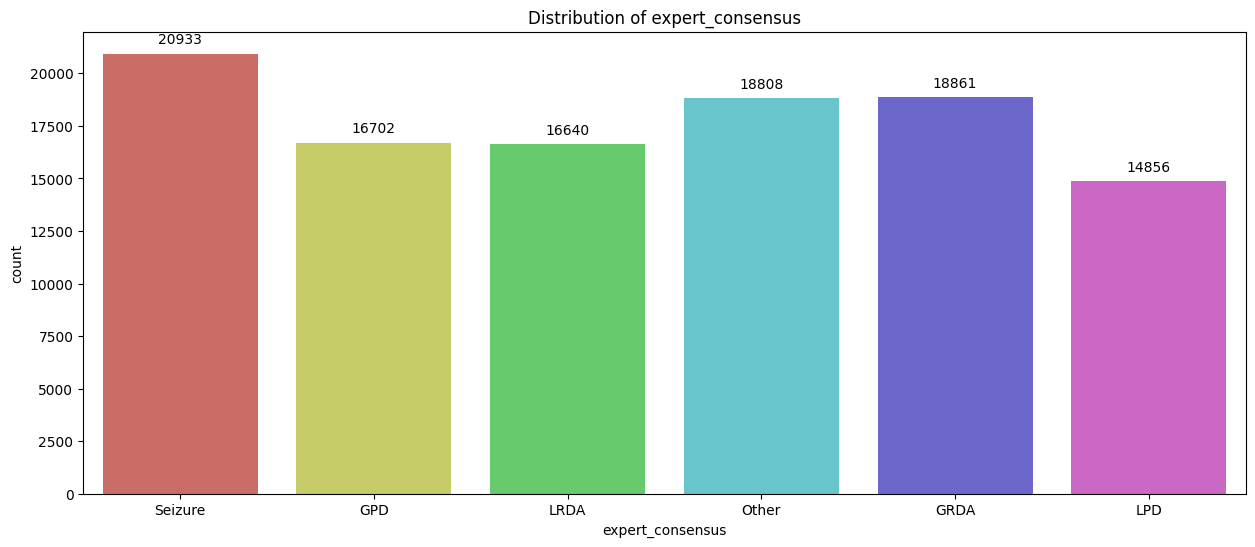

In [ ]:
for col in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=col, data=df, palette='hls')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Distribution of {col}')
    plt.show()


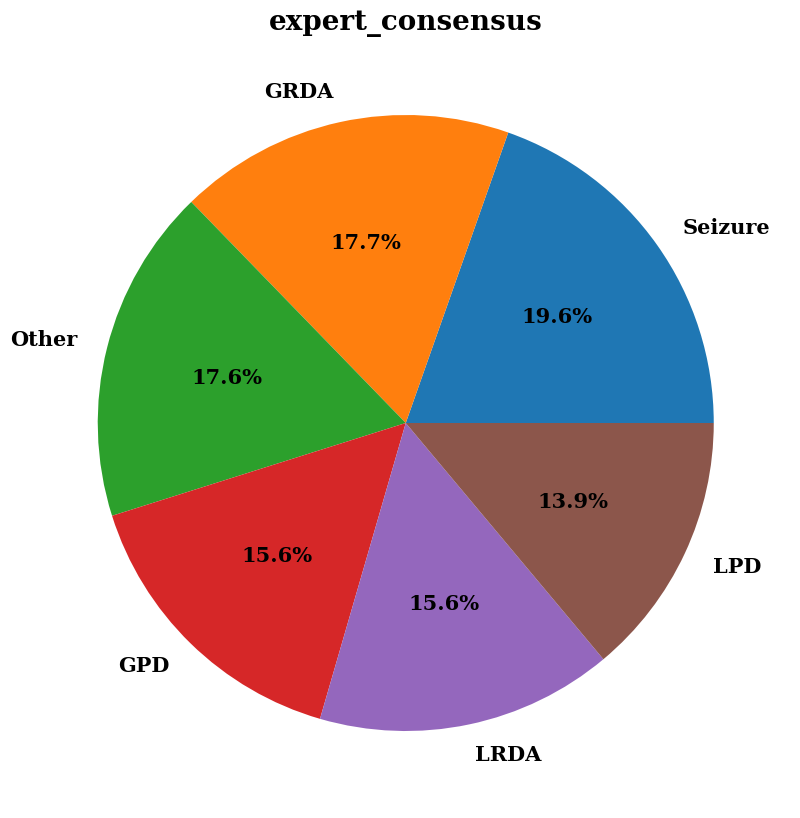

In [ ]:
hfont = {'fontname': 'serif', 'weight': 'bold'}

for col in categorical:
    plt.figure(figsize=(20, 10))

    plt.pie(df[col].value_counts(),
            labels=df[col].value_counts().index,
            autopct='%1.1f%%',
            textprops={'fontsize': 15, 'color': 'black', 'weight': 'bold', 'family': 'serif'})


    plt.title(col, fontsize=20, **hfont)


    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


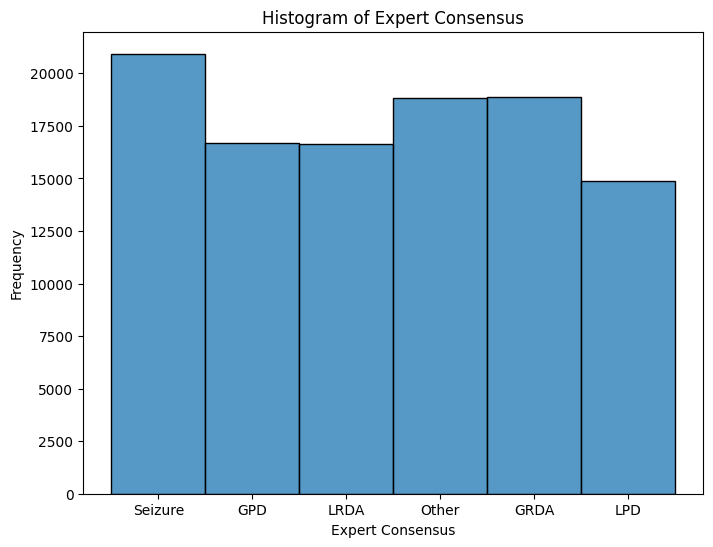

In [ ]:
# df = pd.read_csv('train.csv')



# Plotting the 'expert_consensus' column as a histogram

plt.figure(figsize=(8, 6))

sns.histplot(df['expert_consensus'], bins=10)



# Adding labels and title

plt.xlabel('Expert Consensus')

plt.ylabel('Frequency')

plt.title('Histogram of Expert Consensus')



# Show the plot

plt.show()

In [ ]:
votes_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df_votes = df[votes_columns].melt(var_name='Brain Activity', value_name='Votes')

In [ ]:
df_votes

,Brain Activity,Votes
0,seizure_vote,3
1,seizure_vote,3
2,seizure_vote,3
3,seizure_vote,3
4,seizure_vote,3
...,...,...
640795,other_vote,0
640796,other_vote,0
640797,other_vote,0
640798,other_vote,0


In [ ]:
df_parquet = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1000913311.parquet')
df_parquet

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,-29.770000,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,7.150000,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,-95.839996,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,-62.810001,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883


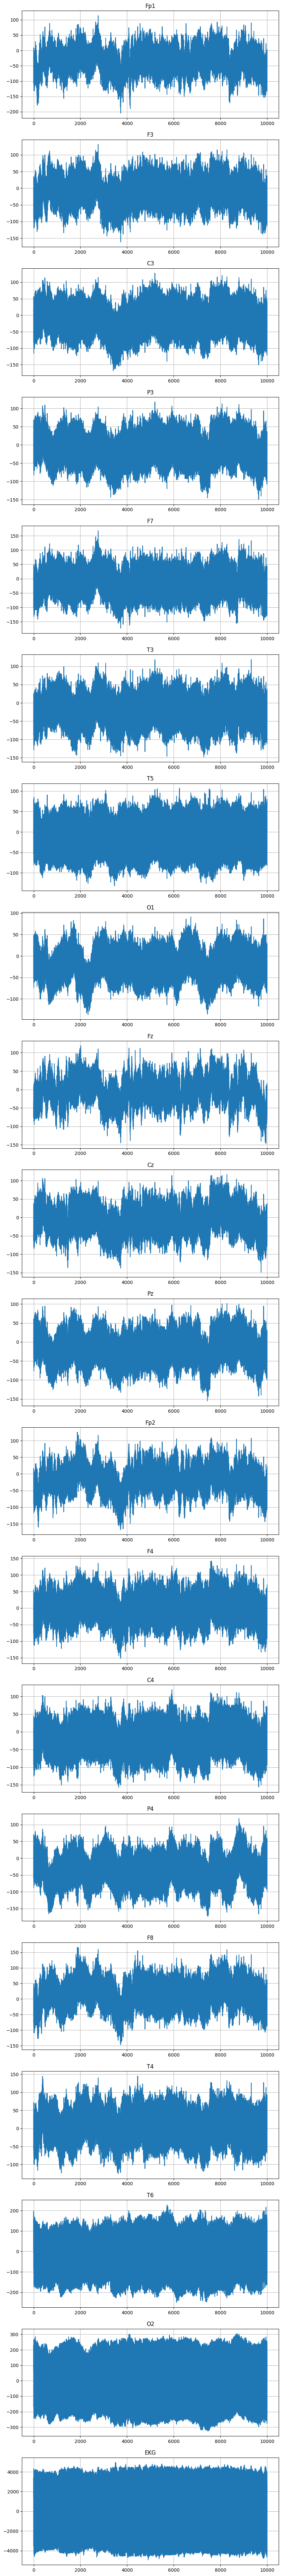

In [ ]:
fig, ax = plt.subplots(20, figsize=(10, 100))

for i, column in enumerate(df_parquet.columns):
    ax[i].plot(df_parquet.index, df_parquet[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

In [ ]:
df_parquet.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

In [ ]:
df1 = df_parquet.copy()
df1['Brain Activity'] = 'other'

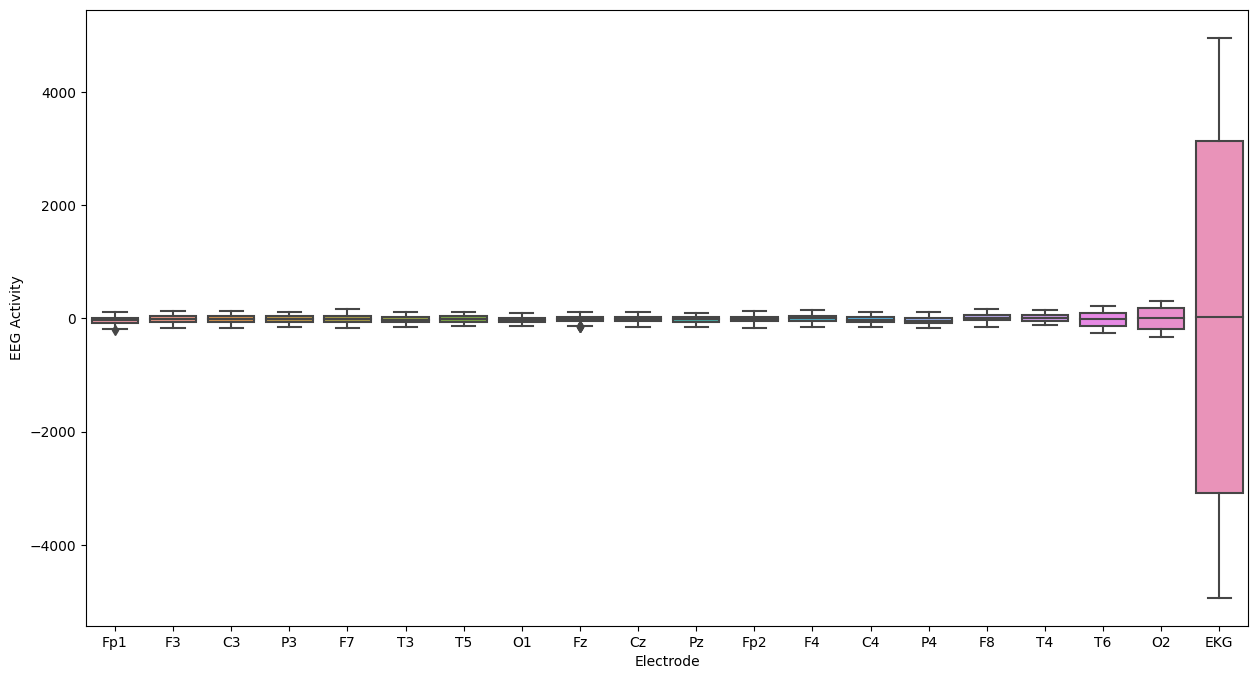

In [ ]:
parquet_colmns = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[parquet_colmns])
plt.xlabel('Electrode')
plt.ylabel('EEG Activity')
plt.show()

In [ ]:
df1 = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1628180742.parquet')
df1.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997


In [ ]:
df1.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

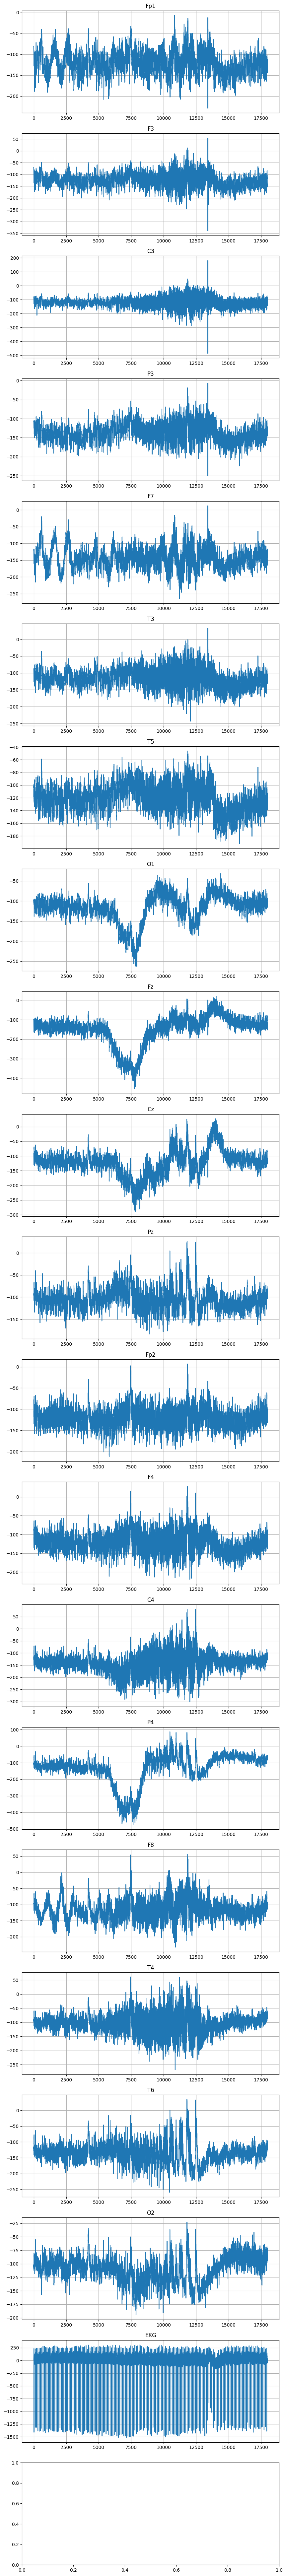

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df1.columns):
    ax[i].plot(df1.index, df1[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

***Creating subid parquet files***


In [ ]:
import pandas as pd

import os



metadata = pd.read_csv('./train.csv')



# Define the sampling rate (200 Hz = 200 samples per second)

sampling_rate = 200



# Defining the duration of the window to extract (50 seconds)

window_duration = 50 * sampling_rate



output_dir = 'testingFiles/'

os.makedirs(output_dir, exist_ok=True)



files_per_category = 1000



grouped_metadata = metadata.groupby('expert_consensus')



for expert_consensus, group in grouped_metadata:

    print(f"Processing category {expert_consensus}")



    category_files = group.head(files_per_category)



    for i, row in category_files.iterrows():

        if i % 100 == 0:

            print(f"Processing row {i} for category {expert_consensus}")



        eeg_id = row['eeg_id']

        eeg_sub_id = row['eeg_sub_id']

        offset_seconds = row['eeg_label_offset_seconds']

        eeg_data = pd.read_parquet(f'./train_eegs/{eeg_id}.parquet')



        offset_samples = int(offset_seconds * sampling_rate)



        # Extract the relevant portion of the EEG data (50 seconds of data)

        eeg_subsample = eeg_data.iloc[offset_samples:offset_samples + window_duration]



        output_file = f'{output_dir}/{eeg_id}_{eeg_sub_id}.parquet'



        # Saving subsample as a new .parquet file

        eeg_subsample.to_parquet(output_file, index=False)



print(f"Processed and saved 1000 files per expert_consensus category.")


Processing category GPD
Processing row 500 for category GPD
Processing row 600 for category GPD
Processing row 700 for category GPD
Processing row 800 for category GPD
Processing row 1000 for category GPD
Processing row 2000 for category GPD
Processing row 2300 for category GPD
Processing row 2900 for category GPD
Processing row 3600 for category GPD
Processing row 3700 for category GPD
Processing category GRDA
Processing row 300 for category GRDA
Processing row 1300 for category GRDA
Processing row 2200 for category GRDA
Processing row 2700 for category GRDA
Processing row 2800 for category GRDA
Processing row 3400 for category GRDA
Processing row 4000 for category GRDA
Processing row 4500 for category GRDA
Processing row 4600 for category GRDA
Processing row 4700 for category GRDA
Processing category LPD
Processing row 1100 for category LPD
Processing row 1700 for category LPD
Processing row 1800 for category LPD
Processing row 3300 for category LPD
Processing row 3800 for category L

***File to generate train.csv file for the selected data***

In [ ]:
import pandas as pd

import os



metadata = pd.read_csv('./train.csv')



file_dir = './testingFiles/'



filtered_rows = []



# Looping through each row in the metadata and check if the corresponding file exists

for i, row in metadata.iterrows():

    eeg_id = row['eeg_id']

    eeg_sub_id = row['eeg_sub_id']



    file_path = f'{file_dir}/{eeg_id}_{eeg_sub_id}.parquet'



    if os.path.exists(file_path):

        # If the file exists, add the row to the filtered list

        filtered_rows.append(row)



filtered_metadata = pd.DataFrame(filtered_rows)



filtered_metadata.to_csv('new_train.csv', index=False)



print(f"New train.csv created with {len(filtered_metadata)} entries based on available files.")


New train.csv created with 6000 entries based on available files.


In [ ]:
import pandas as pd



X_master = pd.DataFrame()  # To store features (EEG subsamples)

y_master = pd.DataFrame()  # To store labels (votes)

chunk_size = 1000

num_files_to_save = 6000



metadata = pd.read_csv('./new_train.csv')



# Loop through the metadata to extract features and labels

for i, row in metadata.iterrows():

    if i >= num_files_to_save:

        break



    if i % 500 == 0:

        print("Processing row", i)



    eeg_id = row['eeg_id']

    eeg_sub_id = row['eeg_sub_id']



    # Loading corresponding EEG data from parquet

    eeg_data = pd.read_parquet(f'./testingFiles/{eeg_id}_{eeg_sub_id}.parquet')



    # Flatten the EEG data and append to X

    X_chunk = pd.DataFrame(eeg_data.values.flatten()).transpose()  # Flatten to 1D and ensure it's a row



    # Append corresponding label to y

    y_chunk = pd.DataFrame([row['expert_consensus']], columns=['expert_consensus'])



    # Concatenate the current chunk to the master DataFrame

    X_master = pd.concat([X_master, X_chunk], ignore_index=True)

    y_master = pd.concat([y_master, y_chunk], ignore_index=True)



    # Clear the current chunk after processing (optional, as we don't need to store chunks)

    X_chunk = None

    y_chunk = None



print("Processing complete. All data loaded into X_master and y_master.")





X=X_master

y=y_master

print(X.shape)

print(y.shape)

Processing row 0
Processing row 199
Processing row 398
Processing row 597
Processing row 796
Processing row 995
Processing row 1194
Processing row 1393
Processing row 1592
Processing row 1791
Processing row 1990
Processing row 2189
Processing row 2388
Processing row 2587
Processing row 2786
Processing row 2985
Processing row 3184
Processing row 3383
Processing row 3582
Processing row 3781
Processing row 3980
Processing row 4179
Processing row 4378
Processing row 4577
Processing row 4776
Processing row 4975
Processing row 5174
Processing row 5373
Processing row 5572
Processing row 5771
Processing row 5970
Processing complete. All data loaded into X_master and y_master.


In [ ]:
import pickle

import os



file_X = 'X_data.pkl'

file_y = 'y_data.pkl'



# Check if the files already exist

if not os.path.exists(file_X) or not os.path.exists(file_y):

    # Save X and y to pickle files if they don't exist

    with open(file_X, 'wb') as f:

        pickle.dump(X_master, f)

    with open(file_y, 'wb') as f:

        pickle.dump(y_master, f)

    print(f"Data has been saved to {file_X} and {file_y}")

else:

    # If the files exist, load X and y from the pickle files

    with open(file_X, 'rb') as f:

        X = pickle.load(f)

    with open(file_y, 'rb') as f:

        y = pickle.load(f)

    print("Data has been loaded from existing pickle files.")






Data has been loaded from existing pickle files.


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score

import pickle

import os





label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)  # This will transform string labels to numerical values



# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)





model_file = 'model.pkl'



# Check if the model file already exists

if not os.path.exists(model_file):



    # Training the Random Forest Classifier

    forest = RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_leaf=2,min_samples_split=13,max_features='sqrt', random_state=42)

    forest.fit(X_train, y_train)



    # Saving  model to a pickle file if it doesn't exist

    with open(model_file, 'wb') as f:

        pickle.dump(forest, f)

    print(f"Model has been saved to {model_file}")

else:

    # If the model file exists, load the model from the pickle file

    with open(model_file, 'rb') as f:

        forest = pickle.load(f)

    print("Model has been loaded from existing pickle file.")









# Predict on testing set

y_pred = forest.predict(X_test)



# Calculating accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"test Accuracy: {accuracy:.4f}")



# Print classification report for detailed metrics

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model has been loaded from existing pickle file.
test Accuracy: 0.5933
              precision    recall  f1-score   support

         GPD       0.77      0.70      0.73       214
        GRDA       0.59      0.68      0.63       181
         LPD       0.46      0.67      0.55       188
        LRDA       0.79      0.63      0.70       223
       Other       0.53      0.31      0.39       201
     Seizure       0.48      0.57      0.52       193

    accuracy                           0.59      1200
   macro avg       0.60      0.59      0.59      1200
weighted avg       0.61      0.59      0.59      1200



In [ ]:


yy=pd.DataFrame(y_train)



value_counts = yy.value_counts()



# Print the counts

print(value_counts)





yy=pd.DataFrame(y_test)



value_counts = yy.value_counts()



# Print the counts

print(value_counts)


0
1    819
2    812
5    807
4    799
0    786
3    777
Name: count, dtype: int64
0
3    223
0    214
4    201
5    193
2    188
1    181
Name: count, dtype: int64
